## *Dataframes* no Python

Itens a serem vistos:

- leitura de *dataframes* com o pandas  
- manipulação de *dataframes*  
- medidas resumo
- gráficos e diagramas de dispersão

*Dataframes*:

- expressam o conteúdo de planilhas
- uma das principais estruturas de dados (usamos o pacote *pandas*)
- bidimensionais e heterogêneos
- linhas representam as observações (começando na posição 0)
- colunas representam as variáveis
- podem ser importados (.csv, .xls etc.) ou podem ser criados

In [ ]:
import pandas as pd
import numpy as np
import os
from scipy import stats
import statsmodels.formula.api as sm

# para gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Lendo arquivo csv a partir de um link

Os dados foram retirados do PAM (Produção Agrícola Municipal) do IBGE:

- dados do Brasil em 2008 e 2018
- informações por município

In [ ]:
# ler uma planilha csv a partir de um link
d = pd.read_csv('https://raw.githubusercontent.com/patriciasiqueira/patriciasiqueira.github.io/master/arquivos/culturas_selecionadas.csv', sep=';', encoding='latin1')

In [ ]:
# visualizar parte das linhas do dataframe
d.head()

,mun,municipio,ano,algodao,arroz,banana,cafe,cana,feijao,fumo,laranja,mandioca,milho,soja,tomate
0,1100015,Alta Floresta D'Oeste (RO),2008,0,1556,1551,11475,359,7600,0,65,5808,17820,0,298
1,1100023,Ariquemes (RO),2008,0,9009,560,3668,564,521,0,827,6000,5025,0,59
2,1100031,Cabixi (RO),2008,0,5400,104,38,300,60,0,32,1920,15000,21000,15
3,1100049,Cacoal (RO),2008,0,2214,4176,12645,600,2612,0,321,11988,6723,0,75
4,1100056,Cerejeiras (RO),2008,0,9900,108,34,2655,54,0,107,2400,14580,57240,143


In [ ]:
d.shape

(11126, 15)

## Leitura de arquivo salvo

Caso o arquivo esteja salvo no computador

Primeiro é preciso carregar o arquivo no painel à esquerda

- Arquivos > Fazer upload


In [ ]:
# ler um arquivo salvo no computador
dados1 = pd.read_csv('qtde-cod-18-mg.csv', encoding='latin1')
dados1.head()

FileNotFoundError: ignored

## A partir do Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/My Drive/Espacial/dados')

In [ ]:
# ler uma planilha csv
dados = pd.read_csv('culturas-2018.csv', encoding='latin1')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5563 entries, 0 to 5562
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   mun        5563 non-null   int64 
 1   municipio  5563 non-null   object
 2   algodao    5563 non-null   int64 
 3   arroz      5563 non-null   int64 
 4   banana     5563 non-null   int64 
 5   cafe       5563 non-null   int64 
 6   cana       5563 non-null   int64 
 7   feijao     5563 non-null   int64 
 8   fumo       5563 non-null   int64 
 9   laranja    5563 non-null   int64 
 10  mandioca   5563 non-null   int64 
 11  milho      5563 non-null   int64 
 12  soja       5563 non-null   int64 
 13  tomate     5563 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 608.6+ KB


In [ ]:
dados.head()

,mun,municipio,algodao,arroz,banana,cafe,cana,feijao,fumo,laranja,mandioca,milho,soja,tomate
0,1100015,Alta Floresta D'Oeste,0,705,1859,15356,0,2044,0,0,11320,16267,1350,500
1,1100023,Ariquemes,0,2680,2916,208,1380,4,0,12,5850,3600,16800,45
2,1100031,Cabixi,0,8820,175,113,17000,0,0,20,1680,94647,86234,0
3,1100049,Cacoal,0,90,5220,20384,1320,788,0,0,13400,3616,1710,31
4,1100056,Cerejeiras,0,3600,79,49,3325,22,0,0,2925,100965,112620,1080


In [ ]:
dados.query("municipio "= 'Arique')

## Unir com conjunto de dados com informações adicionais sobre municípios

In [ ]:
cod = pd.read_csv('https://raw.githubusercontent.com/patriciasiqueira/patriciasiqueira.github.io/master/arquivos/codigos-mun.csv', encoding='utf8')
cod.head()

,uf,nome_uf,mun,nome_mun,rm,meso,nome_meso,micro,nome_micro,codmun6,regiao,nome_regiao
0,11,Rondônia,1100015,Alta Floresta D'Oeste,NaN,1102,Leste Rondoniense,11006,Cacoal,110001,1,Norte
1,11,Rondônia,1100023,Ariquemes,NaN,1102,Leste Rondoniense,11003,Ariquemes,110002,1,Norte
2,11,Rondônia,1100031,Cabixi,NaN,1102,Leste Rondoniense,11008,Colorado do Oeste,110003,1,Norte
3,11,Rondônia,1100049,Cacoal,NaN,1102,Leste Rondoniense,11006,Cacoal,110004,1,Norte
4,11,Rondônia,1100056,Cerejeiras,NaN,1102,Leste Rondoniense,11008,Colorado do Oeste,110005,1,Norte


In [ ]:
# mesclar dataframes
dados = dados.merge(cod)

In [ ]:
dados.head()

,mun,municipio,algodao,arroz,banana,cafe,cana,feijao,fumo,laranja,...,nome_uf,nome_mun,rm,meso,nome_meso,micro,nome_micro,codmun6,regiao,nome_regiao
0,1100015,Alta Floresta D'Oeste,0,705,1859,15356,0,2044,0,0,...,Rondônia,Alta Floresta D'Oeste,NaN,1102,Leste Rondoniense,11006,Cacoal,110001,1,Norte
1,1100023,Ariquemes,0,2680,2916,208,1380,4,0,12,...,Rondônia,Ariquemes,NaN,1102,Leste Rondoniense,11003,Ariquemes,110002,1,Norte
2,1100031,Cabixi,0,8820,175,113,17000,0,0,20,...,Rondônia,Cabixi,NaN,1102,Leste Rondoniense,11008,Colorado do Oeste,110003,1,Norte
3,1100049,Cacoal,0,90,5220,20384,1320,788,0,0,...,Rondônia,Cacoal,NaN,1102,Leste Rondoniense,11006,Cacoal,110004,1,Norte
4,1100056,Cerejeiras,0,3600,79,49,3325,22,0,0,...,Rondônia,Cerejeiras,NaN,1102,Leste Rondoniense,11008,Colorado do Oeste,110005,1,Norte


In [ ]:
dados.columns

Index(['mun', 'municipio', 'algodao', 'arroz', 'banana', 'cafe', 'cana',
       'feijao', 'fumo', 'laranja', 'mandioca', 'milho', 'soja', 'tomate',
       'uf', 'nome_uf', 'nome_mun', 'rm', 'meso', 'nome_meso', 'micro',
       'nome_micro', 'codmun6', 'regiao', 'nome_regiao'],
      dtype='object')

In [ ]:
# reorganizar colunas
dados = dados.loc[:, ['mun', 'nome_mun', 'uf', 'nome_uf', 'meso', 'nome_meso', 'micro',
       'nome_micro', 'regiao', 'nome_regiao', 'algodao', 'arroz', 'banana', 'cafe', 'cana',
       'feijao', 'fumo', 'laranja', 'mandioca', 'milho', 'soja', 'tomate']]

In [ ]:
dados.head()

,mun,nome_mun,uf,nome_uf,meso,nome_meso,micro,nome_micro,regiao,nome_regiao,...,banana,cafe,cana,feijao,fumo,laranja,mandioca,milho,soja,tomate
0,1100015,Alta Floresta D'Oeste,11,Rondônia,1102,Leste Rondoniense,11006,Cacoal,1,Norte,...,1859,15356,0,2044,0,0,11320,16267,1350,500
1,1100023,Ariquemes,11,Rondônia,1102,Leste Rondoniense,11003,Ariquemes,1,Norte,...,2916,208,1380,4,0,12,5850,3600,16800,45
2,1100031,Cabixi,11,Rondônia,1102,Leste Rondoniense,11008,Colorado do Oeste,1,Norte,...,175,113,17000,0,0,20,1680,94647,86234,0
3,1100049,Cacoal,11,Rondônia,1102,Leste Rondoniense,11006,Cacoal,1,Norte,...,5220,20384,1320,788,0,0,13400,3616,1710,31
4,1100056,Cerejeiras,11,Rondônia,1102,Leste Rondoniense,11008,Colorado do Oeste,1,Norte,...,79,49,3325,22,0,0,2925,100965,112620,1080


In [ ]:
dados.shape

(5563, 22)

# Análise descritiva - PAM 2018

In [ ]:
# verificar os tipos de dados
dados.dtypes

mun             int64
nome_mun       object
uf              int64
nome_uf        object
meso            int64
nome_meso      object
micro           int64
nome_micro     object
regiao          int64
nome_regiao    object
algodao         int64
arroz           int64
banana          int64
cafe            int64
cana            int64
feijao          int64
fumo            int64
laranja         int64
mandioca        int64
milho           int64
soja            int64
tomate          int64
dtype: object

In [ ]:
# nomes das variáveis
dados.columns

Index(['mun', 'nome_mun', 'uf', 'nome_uf', 'meso', 'nome_meso', 'micro',
       'nome_micro', 'regiao', 'nome_regiao', 'algodao', 'arroz', 'banana',
       'cafe', 'cana', 'feijao', 'fumo', 'laranja', 'mandioca', 'milho',
       'soja', 'tomate'],
      dtype='object')

In [ ]:
# mostrar apenas os valores
dados.values

array([[1100015, "Alta Floresta D'Oeste", 11, ..., 16267, 1350, 500],
       [1100023, 'Ariquemes', 11, ..., 3600, 16800, 45],
       [1100031, 'Cabixi', 11, ..., 94647, 86234, 0],
       ...,
       [5222203, 'Vila Boa', 52, ..., 9750, 7500, 0],
       [5222302, 'Vila Propício', 52, ..., 6720, 45640, 3255],
       [5300108, 'Brasília', 53, ..., 392580, 253110, 28000]],
      dtype=object)

**Medidas resumo (estatísticas)**

In [ ]:
# resumo estatístico das variáveis
dados.describe()

,mun,uf,meso,micro,regiao,algodao,arroz,banana,cafe,cana,feijao,fumo,laranja,mandioca,milho,soja,tomate
count,5.563000e+03,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5.563000e+03,5563.000000,5563.000000,5563.000000,5563.000000,5.563000e+03,5.563000e+03,5563.000000
mean,3.253730e+06,32.379112,3242.170412,32396.726586,2.898077,890.894122,2112.024447,1213.764336,639.338127,1.342492e+05,524.003236,137.024267,3004.410210,3171.801726,1.479207e+04,2.119138e+04,738.853496
std,9.852301e+05,9.837090,983.958252,9838.143463,1.088597,15612.116883,22025.233521,7192.837342,3243.488283,4.966400e+05,2565.962674,1060.538834,20490.427915,12115.654750,7.763764e+04,9.105777e+04,7465.342833
min,1.100015e+06,11.000000,1101.000000,11001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,2.512089e+06,25.000000,2503.000000,25015.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.000000,0.000000,0.000000,66.000000,1.000000e+02,0.000000e+00,0.000000
50%,3.146107e+06,31.000000,3110.000000,31047.000000,3.000000,0.000000,0.000000,36.000000,0.000000,2.400000e+02,42.000000,0.000000,0.000000,400.000000,7.740000e+02,0.000000e+00,0.000000
75%,4.119276e+06,41.000000,4106.000000,41024.000000,4.000000,0.000000,12.000000,260.000000,2.000000,3.600000e+03,200.000000,0.000000,108.000000,1800.000000,5.940000e+03,5.512000e+03,50.000000
max,5.300108e+06,53.000000,5301.000000,53001.000000,5.000000,756891.000000,755486.000000,210975.000000,82830.000000,8.118000e+06,63870.000000,26790.000000,510000.000000,373809.000000,2.851200e+06,2.232000e+06,356000.000000


In [ ]:
dados.iloc[:, 10:].describe()

,algodao,arroz,banana,cafe,cana,feijao,fumo,laranja,mandioca,milho,soja,tomate
count,5563.000000,5563.000000,5563.000000,5563.000000,5.563000e+03,5563.000000,5563.000000,5563.000000,5563.000000,5.563000e+03,5.563000e+03,5563.000000
mean,890.894122,2112.024447,1213.764336,639.338127,1.342492e+05,524.003236,137.024267,3004.410210,3171.801726,1.479207e+04,2.119138e+04,738.853496
std,15612.116883,22025.233521,7192.837342,3243.488283,4.966400e+05,2565.962674,1060.538834,20490.427915,12115.654750,7.763764e+04,9.105777e+04,7465.342833
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.000000,0.000000,0.000000,66.000000,1.000000e+02,0.000000e+00,0.000000
50%,0.000000,0.000000,36.000000,0.000000,2.400000e+02,42.000000,0.000000,0.000000,400.000000,7.740000e+02,0.000000e+00,0.000000
75%,0.000000,12.000000,260.000000,2.000000,3.600000e+03,200.000000,0.000000,108.000000,1800.000000,5.940000e+03,5.512000e+03,50.000000
max,756891.000000,755486.000000,210975.000000,82830.000000,8.118000e+06,63870.000000,26790.000000,510000.000000,373809.000000,2.851200e+06,2.232000e+06,356000.000000


In [ ]:
# média
dados.iloc[:, 10:].mean()

algodao        890.894122
arroz         2112.024447
banana        1213.764336
cafe           639.338127
cana        134249.174366
feijao         524.003236
fumo           137.024267
laranja       3004.410210
mandioca      3171.801726
milho        14792.072263
soja         21191.384505
tomate         738.853496
dtype: float64

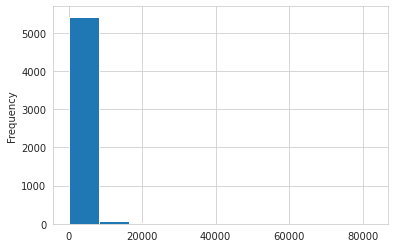

In [ ]:
# histograma de uma das culturas
dados.cafe.plot.hist();

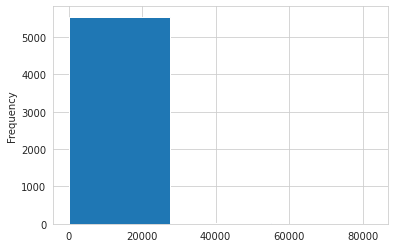

In [ ]:
dados.cafe.plot.hist(bins=3);

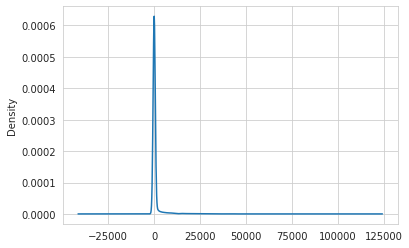

In [ ]:
# histograma suavizado
dados.cafe.plot.kde();

In [ ]:
# valor máximo de uma variável
dados.cafe.max()

82830

In [ ]:
# retornar o município com valor máximo de alguma variável
dados.sort_values('cafe', ascending=False).head(10)

,mun,nome_mun,uf,nome_uf,meso,nome_meso,micro,nome_micro,regiao,nome_regiao,...,banana,cafe,cana,feijao,fumo,laranja,mandioca,milho,soja,tomate
2804,3148103,Patrocínio,31,Minas Gerais,3105,Triângulo Mineiro/Alto Paranaíba,31019,Patrocínio,3,Sudeste,...,160,82830,420,7230,0,2100,798,84600,64800,3360
3057,3169406,Três Pontas,31,Minas Gerais,3110,Sul/Sudoeste de Minas,31050,Varginha,3,Sudeste,...,250,43290,235,153,0,8,48,9645,10368,36
3138,3203205,Linhares,32,Espírito Santo,3202,Litoral Norte Espírito-santense,32006,Linhares,3,Sudeste,...,38651,42806,664826,112,0,1800,9000,651,0,0
2368,3111606,Campos Gerais,31,Minas Gerais,3110,Sul/Sudoeste de Minas,31050,Varginha,3,Sudeste,...,90,39560,555,2286,0,10,100,26100,6372,2925
22,1100320,São Miguel do Guaporé,11,Rondônia,1102,Leste Rondoniense,11005,Alvorada D'Oeste,1,Norte,...,120,38398,0,19,0,82,780,360,32010,0
3027,3166808,Serra do Salitre,31,Minas Gerais,3105,Triângulo Mineiro/Alto Paranaíba,31019,Patrocínio,3,Sudeste,...,20,37721,0,3872,0,1800,30,73200,52080,1980
2692,3139003,Machado,31,Minas Gerais,3110,Sul/Sudoeste de Minas,31049,Alfenas,3,Sudeste,...,120,35912,3500,810,0,30,98,34000,10800,1200
2579,3129707,Ibiraci,31,Minas Gerais,3110,Sul/Sudoeste de Minas,31047,Passos,3,Sudeste,...,150,34500,0,10,0,11460,60,1008,900,360
3155,3204351,Rio Bananal,32,Espírito Santo,3202,Litoral Norte Espírito-santense,32006,Linhares,3,Sudeste,...,1500,33950,3750,180,0,0,713,270,0,0
3134,3203056,Jaguaré,32,Espírito Santo,3202,Litoral Norte Espírito-santense,32005,São Mateus,3,Sudeste,...,500,33203,0,50,0,274,360,20,0,0


In [ ]:
# como seria para mostrar o menor valor?
dados.sort_values('cafe', ascending=True).head(20)

,mun,nome_mun,uf,nome_uf,meso,nome_meso,micro,nome_micro,regiao,nome_regiao,...,banana,cafe,cana,feijao,fumo,laranja,mandioca,milho,soja,tomate
5051,4321600,Tramandaí,43,Rio Grande do Sul,4305,Metropolitana de Porto Alegre,43027,Osório,4,Sul,...,0,0,0,0,0,0,100,15,9,0
4812,4310603,Itaqui,43,Rio Grande do Sul,4306,Sudoeste Rio-grandense,43029,Campanha Ocidental,4,Sul,...,0,0,0,0,0,207,360,42000,62400,0
2876,3154408,Ressaquinha,31,Minas Gerais,3111,Campo das Vertentes,31059,Barbacena,3,Sudeste,...,0,0,1050,330,0,0,54,3885,390,1960
2877,3154457,Riachinho,31,Minas Gerais,3102,Norte de Minas,31006,Pirapora,3,Sudeste,...,45,0,9000,1050,0,12201,480,3480,15840,0
2878,3154507,Riacho dos Machados,31,Minas Gerais,3102,Norte de Minas,31004,Janaúba,3,Sudeste,...,20,0,600,63,0,0,203,153,0,0
2879,3154606,Ribeirão das Neves,31,Minas Gerais,3107,Metropolitana de Belo Horizonte,31030,Belo Horizonte,3,Sudeste,...,0,0,300,2,0,0,22,9,0,0
4811,4310579,Itapuca,43,Rio Grande do Sul,4302,Nordeste Rio-grandense,43014,Guaporé,4,Sul,...,10,0,320,58,594,270,165,4680,15840,30
2881,3154804,Rio Acima,31,Minas Gerais,3107,Metropolitana de Belo Horizonte,31030,Belo Horizonte,3,Sudeste,...,10,0,90,3,0,0,10,13,0,0
2883,3155009,Rio Doce,31,Minas Gerais,3112,Zona da Mata,31060,Ponte Nova,3,Sudeste,...,0,0,2400,6,0,0,16,150,0,0
2884,3155108,Rio do Prado,31,Minas Gerais,3103,Jequitinhonha,31014,Almenara,3,Sudeste,...,0,0,0,1,0,0,208,11,0,0


In [ ]:
# variância
dados.cana.var()

246651281276.6381

In [ ]:
# desvio padrão
dados.cana.std()

496639.9916203266

In [ ]:
# correlação entre duas variáveis
dados.cana.corr(dados.cafe)

-0.009154366961292097

In [ ]:
# correlação entre todas as variáveis do conjunto de dados
dados.corr()

,mun,uf,meso,micro,regiao,algodao,arroz,banana,cafe,cana,feijao,fumo,laranja,mandioca,milho,soja,tomate
mun,1.000000,0.999869,0.999886,0.999880,0.976637,0.068365,0.077490,-0.031529,-0.024866,0.138721,0.118548,0.125116,0.034633,-0.118355,0.210435,0.238140,0.073050
uf,0.999869,1.000000,0.999995,0.999999,0.976505,0.068809,0.078068,-0.031429,-0.026574,0.136954,0.118634,0.125783,0.033844,-0.116939,0.211443,0.239573,0.073035
meso,0.999886,0.999995,1.000000,0.999998,0.976557,0.068663,0.078107,-0.031289,-0.026154,0.136838,0.118637,0.125854,0.033893,-0.117154,0.211238,0.239257,0.073066
micro,0.999880,0.999999,0.999998,1.000000,0.976538,0.068743,0.078114,-0.031399,-0.026344,0.136912,0.118611,0.125814,0.033881,-0.117091,0.211332,0.239416,0.073027
regiao,0.976637,0.976505,0.976557,0.976538,1.000000,0.064059,0.074182,-0.037243,-0.002171,0.115686,0.127449,0.126344,0.013080,-0.102350,0.219798,0.244334,0.068868
algodao,0.068365,0.068809,0.068663,0.068743,0.064059,1.000000,0.001275,-0.005485,0.009979,0.029685,0.225791,-0.006422,-0.005937,-0.008127,0.452253,0.558537,0.011792
arroz,0.077490,0.078068,0.078107,0.078114,0.074182,0.001275,1.000000,-0.002472,-0.017241,-0.020518,0.004169,0.070887,-0.012690,0.002643,0.014855,0.058734,-0.007274
banana,-0.031529,-0.031429,-0.031289,-0.031399,-0.037243,-0.005485,-0.002472,1.000000,0.025376,-0.014500,-0.010040,-0.019048,-0.004771,0.034570,-0.016125,-0.025219,0.041109
cafe,-0.024866,-0.026574,-0.026154,-0.026344,-0.002171,0.009979,-0.017241,0.025376,1.000000,-0.009154,0.064242,-0.024153,0.011084,-0.023764,0.015161,0.001141,0.054606
cana,0.138721,0.136954,0.136838,0.136912,0.115686,0.029685,-0.020518,-0.014500,-0.009154,1.000000,0.052148,-0.034655,0.258878,0.014290,0.140296,0.112422,0.056573


In [ ]:
dados.iloc[:, 10:].corr()

,algodao,arroz,banana,cafe,cana,feijao,fumo,laranja,mandioca,milho,soja,tomate
algodao,1.000000,0.001275,-0.005485,0.009979,0.029685,0.225791,-0.006422,-0.005937,-0.008127,0.452253,0.558537,0.011792
arroz,0.001275,1.000000,-0.002472,-0.017241,-0.020518,0.004169,0.070887,-0.012690,0.002643,0.014855,0.058734,-0.007274
banana,-0.005485,-0.002472,1.000000,0.025376,-0.014500,-0.010040,-0.019048,-0.004771,0.034570,-0.016125,-0.025219,0.041109
cafe,0.009979,-0.017241,0.025376,1.000000,-0.009154,0.064242,-0.024153,0.011084,-0.023764,0.015161,0.001141,0.054606
cana,0.029685,-0.020518,-0.014500,-0.009154,1.000000,0.052148,-0.034655,0.258878,0.014290,0.140296,0.112422,0.056573
feijao,0.225791,0.004169,-0.010040,0.064242,0.052148,1.000000,0.106272,0.052130,0.002029,0.502913,0.518498,0.290372
fumo,-0.006422,0.070887,-0.019048,-0.024153,-0.034655,0.106272,1.000000,-0.015744,0.004771,0.012901,0.020650,-0.005653
laranja,-0.005937,-0.012690,-0.004771,0.011084,0.258878,0.052130,-0.015744,1.000000,0.028353,0.019858,-0.005217,0.025316
mandioca,-0.008127,0.002643,0.034570,-0.023764,0.014290,0.002029,0.004771,0.028353,1.000000,0.009443,0.006306,-0.006783
milho,0.452253,0.014855,-0.016125,0.015161,0.140296,0.502913,0.012901,0.019858,0.009443,1.000000,0.877410,0.080313


In [ ]:
dados.iloc[:, 10:].corr().unstack().sort_values(ascending=False).drop_duplicates()

algodao  algodao     1.000000
soja     milho       0.877410
algodao  soja        0.558537
feijao   soja        0.518498
milho    feijao      0.502913
                       ...   
arroz    cana       -0.020518
cafe     mandioca   -0.023764
         fumo       -0.024153
banana   soja       -0.025219
cana     fumo       -0.034655
Length: 67, dtype: float64

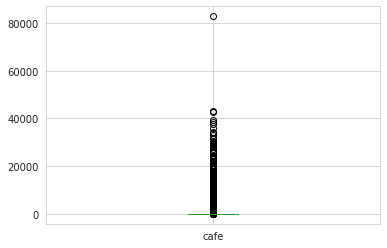

In [ ]:
dados.boxplot('cafe');

**Diagrama de dispersão**

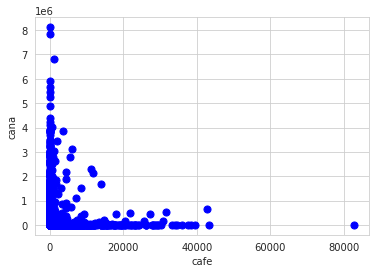

In [ ]:
dados.plot.scatter('cafe', 'cana', s=50, c='blue');

In [ ]:
# correlação
dados.cafe.corr(dados.cana)

-0.009154366961292097

In [ ]:
# agrupar produção por estado
dados.groupby('nome_uf').cafe.sum()

nome_uf
Acre                      1969
Alagoas                      0
Amapá                        0
Amazonas                   347
Bahia                   248605
Ceará                      669
Distrito Federal           552
Espírito Santo          811080
Goiás                    21091
Maranhão                     0
Mato Grosso               6963
Mato Grosso do Sul         221
Minas Gerais           1900970
Paraná                   65170
Paraíba                      0
Pará                       282
Pernambuco                 996
Piauí                        0
Rio Grande do Norte          0
Rio Grande do Sul            0
Rio de Janeiro           18712
Rondônia                136251
Roraima                      0
Santa Catarina               0
Sergipe                      0
São Paulo               342760
Tocantins                    0
Name: cafe, dtype: int64

In [ ]:
# ordenar o resultado anterior
dados.groupby('nome_uf').cafe.sum().sort_values(ascending=False).round(2)

nome_uf
Minas Gerais           1900970
Espírito Santo          811080
São Paulo               342760
Bahia                   248605
Rondônia                136251
Paraná                   65170
Goiás                    21091
Rio de Janeiro           18712
Mato Grosso               6963
Acre                      1969
Pernambuco                 996
Ceará                      669
Distrito Federal           552
Amazonas                   347
Pará                       282
Mato Grosso do Sul         221
Maranhão                     0
Amapá                        0
Sergipe                      0
Santa Catarina               0
Roraima                      0
Rio Grande do Norte          0
Rio Grande do Sul            0
Piauí                        0
Paraíba                      0
Alagoas                      0
Tocantins                    0
Name: cafe, dtype: int64

**Mostrar valores que atendam a alguma condição específica:**

In [ ]:
# Mostrar os municípios que têm produção da cultura
dados.query('cafe > 0')

,mun,nome_mun,uf,nome_uf,meso,nome_meso,micro,nome_micro,regiao,nome_regiao,...,banana,cafe,cana,feijao,fumo,laranja,mandioca,milho,soja,tomate
0,1100015,Alta Floresta D'Oeste,11,Rondônia,1102,Leste Rondoniense,11006,Cacoal,1,Norte,...,1859,15356,0,2044,0,0,11320,16267,1350,500
1,1100023,Ariquemes,11,Rondônia,1102,Leste Rondoniense,11003,Ariquemes,1,Norte,...,2916,208,1380,4,0,12,5850,3600,16800,45
2,1100031,Cabixi,11,Rondônia,1102,Leste Rondoniense,11008,Colorado do Oeste,1,Norte,...,175,113,17000,0,0,20,1680,94647,86234,0
3,1100049,Cacoal,11,Rondônia,1102,Leste Rondoniense,11006,Cacoal,1,Norte,...,5220,20384,1320,788,0,0,13400,3616,1710,31
4,1100056,Cerejeiras,11,Rondônia,1102,Leste Rondoniense,11008,Colorado do Oeste,1,Norte,...,79,49,3325,22,0,0,2925,100965,112620,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5501,5217401,Pires do Rio,52,Goiás,5205,Sul Goiano,52016,Pires do Rio,5,Centro-Oeste,...,144,38,0,0,0,0,380,7900,17500,0
5513,5218805,Rio Verde,52,Goiás,5205,Sul Goiano,52013,Sudoeste de Goiás,5,Centro-Oeste,...,2380,1540,2624000,9260,0,7950,2590,1328100,1170000,0
5531,5220009,São João d'Aliança,52,Goiás,5202,Norte Goiano,52005,Chapada dos Veadeiros,5,Centro-Oeste,...,0,130,0,21400,0,0,2626,81800,90000,1620
5543,5220702,Sítio d'Abadia,52,Goiás,5204,Leste Goiano,52011,Vão do Paranã,5,Centro-Oeste,...,0,180,560,968,0,0,70,5683,15008,0


In [ ]:
# outro comando com a mesma ideia
dados[dados.cafe > 0]

,mun,nome_mun,uf,nome_uf,meso,nome_meso,micro,nome_micro,regiao,nome_regiao,...,banana,cafe,cana,feijao,fumo,laranja,mandioca,milho,soja,tomate
0,1100015,Alta Floresta D'Oeste,11,Rondônia,1102,Leste Rondoniense,11006,Cacoal,1,Norte,...,1859,15356,0,2044,0,0,11320,16267,1350,500
1,1100023,Ariquemes,11,Rondônia,1102,Leste Rondoniense,11003,Ariquemes,1,Norte,...,2916,208,1380,4,0,12,5850,3600,16800,45
2,1100031,Cabixi,11,Rondônia,1102,Leste Rondoniense,11008,Colorado do Oeste,1,Norte,...,175,113,17000,0,0,20,1680,94647,86234,0
3,1100049,Cacoal,11,Rondônia,1102,Leste Rondoniense,11006,Cacoal,1,Norte,...,5220,20384,1320,788,0,0,13400,3616,1710,31
4,1100056,Cerejeiras,11,Rondônia,1102,Leste Rondoniense,11008,Colorado do Oeste,1,Norte,...,79,49,3325,22,0,0,2925,100965,112620,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5501,5217401,Pires do Rio,52,Goiás,5205,Sul Goiano,52016,Pires do Rio,5,Centro-Oeste,...,144,38,0,0,0,0,380,7900,17500,0
5513,5218805,Rio Verde,52,Goiás,5205,Sul Goiano,52013,Sudoeste de Goiás,5,Centro-Oeste,...,2380,1540,2624000,9260,0,7950,2590,1328100,1170000,0
5531,5220009,São João d'Aliança,52,Goiás,5202,Norte Goiano,52005,Chapada dos Veadeiros,5,Centro-Oeste,...,0,130,0,21400,0,0,2626,81800,90000,1620
5543,5220702,Sítio d'Abadia,52,Goiás,5204,Leste Goiano,52011,Vão do Paranã,5,Centro-Oeste,...,0,180,560,968,0,0,70,5683,15008,0


In [ ]:
dados[dados.milho > 0].shape

(5069, 22)

Questionário:

1 No total, considerando todas as variáveis, quantas observações e quantas variáveis estão presentes no conjunto de dados? Use o comando dados.shape para responder a essa pergunta.

In [ ]:
dados.shape

(5563, 22)

2 Qual seria o comando mais correto para retornar a quantidade total de toneladas produzida no Brasil em 2018 para cada uma das culturas?

In [ ]:
dados.iloc[:, 10:].sum()

algodao       4956044
arroz        11749192
banana        6752171
cafe          3556638
cana        746828157
feijao        2915030
fumo           762266
laranja      16713534
mandioca     17644733
milho        82288298
soja        117887672
tomate        4110242
dtype: int64

In [ ]:
dados.iloc[:, 10:].sum().sort_values(ascending=False).round(0)

cana        746828157
soja        117887672
milho        82288298
mandioca     17644733
laranja      16713534
arroz        11749192
banana        6752171
algodao       4956044
tomate        4110242
cafe          3556638
feijao        2915030
fumo           762266
dtype: int64

3 Com base na saída obtida na questão 2, responda:

a) Qual a cultura apresentou maior produção total absoluta em 2018?

Cana

b) Qual foi o valor dessa produção (em toneladas)?

In [ ]:
dados.cana.sum()

c) Qual a cultura apresentou menor produção total absoluta em 2018?

Fumo

d) Qual foi o valor dessa produção (em toneladas)?

In [ ]:
dados.fumo.sum()

762266

4 Eu gostaria de saber quantos municípios produtores existem de cada cultura. A forma mais simples é calcular o número de ocorrências diferentes de zero em cada coluna por meio de:

In [ ]:
dados.iloc[:, 10:].astype(bool).sum().sort_values(ascending=False).round(0)

milho       5069
mandioca    4730
feijao      4330
banana      3399
cana        3345
laranja     2420
soja        2318
arroz       1925
tomate      1788
cafe        1448
fumo         651
algodao      223
dtype: int64

a) Qual a cultura apresenta mais municípios produtores?

milho

b) Quantos municípios produzem essa cultura?

In [ ]:
dados.milho.astype(bool).sum()

5069

c) Isso significa que quantos % dos municípios brasileiros (que são 5.570) produzem essa cultura?

In [ ]:
dados.milho.astype(bool).sum() / 5570

0.9100538599640934

5 A correlação entre milho e feijão é considerada positiva e moderada.

a) Qual o comando deveria ser usado para calcular o valor dessa correlação específica?

In [ ]:
dados.milho.corr(dados.feijao)

0.5029130010968781

b) Qual o valor dessa correlação?

In [ ]:
dados.milho.corr(dados.feijao)

6 Qual o comando deveria ser usado para mostrar os municípios que tiveram produção de fumo maior do que 10.000 toneladas no Brasil?

In [ ]:
dados.query('fumo > 10000')

,mun,nome_mun,uf,nome_uf,meso,nome_meso,micro,nome_micro,regiao,nome_regiao,...,banana,cafe,cana,feijao,fumo,laranja,mandioca,milho,soja,tomate
4050,4110102,Imbituva,41,Paraná,4109,Sudeste Paranaense,41031,Prudentópolis,4,Sul,...,0,0,0,8694,10004,0,2590,57560,80500,170
4054,4110508,Ipiranga,41,Paraná,4109,Sudeste Paranaense,41031,Prudentópolis,4,Sul,...,0,0,0,5270,12090,0,2400,17340,86250,234
4152,4117701,Palmeira,41,Paraná,4105,Centro Oriental Paranaense,41021,Ponta Grossa,4,Sul,...,0,0,0,14595,12880,0,1900,73500,183600,1100
4168,4119103,Piên,41,Paraná,4110,Metropolitana de Curitiba,41039,Rio Negro,4,Sul,...,0,0,0,1240,11130,0,1100,15174,14880,60
4190,4120606,Prudentópolis,41,Paraná,4109,Sudeste Paranaense,41031,Prudentópolis,4,Sul,...,72,0,1450,35100,11756,850,6650,72820,119700,135
4209,4122008,Rio Azul,41,Paraná,4109,Sudeste Paranaense,41032,Irati,4,Sul,...,0,0,0,3897,15845,0,1440,36220,52000,57
4248,4125100,São João do Triunfo,41,Paraná,4109,Sudeste Paranaense,41034,São Mateus do Sul,4,Sul,...,0,0,0,3090,26790,0,272,19000,20350,55
4362,4203808,Canoinhas,42,Santa Catarina,4202,Norte Catarinense,42006,Canoinhas,4,Sul,...,0,0,0,2125,14713,0,0,31500,79350,500
4426,4207908,Irineópolis,42,Santa Catarina,4202,Norte Catarinense,42006,Canoinhas,4,Sul,...,0,0,0,1563,10070,0,0,19800,42480,600
4428,4208104,Itaiópolis,42,Santa Catarina,4202,Norte Catarinense,42006,Canoinhas,4,Sul,...,0,0,0,3040,14490,0,0,52800,63336,0


7 Qual foi o município maior produtor de banana do Brasil em 2018?

In [ ]:
# retornar o município com valor máximo de alguma variável
dados.sort_values('banana', ascending=False).head(1)

,mun,nome_mun,uf,nome_uf,meso,nome_meso,micro,nome_micro,regiao,nome_regiao,...,banana,cafe,cana,feijao,fumo,laranja,mandioca,milho,soja,tomate
2638,3135050,Jaíba,31,Minas Gerais,3102,Norte de Minas,31004,Janaúba,3,Sudeste,...,210975,30,733000,550,0,910,10440,8790,54,47670
